<a href="https://colab.research.google.com/github/Shruti-Rani/LGMVIP-DataScience/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
data=pd.read_csv(r'/content/sample_data/stock_market (MConverter.eu).csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,7/27/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,7/26/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,7/23/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,7/22/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,7/21/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [15]:
df.shape

(2035, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 2035 non-null   int64         
 1   Date                  2035 non-null   datetime64[ns]
 2   Open                  2035 non-null   float64       
 3   High                  2035 non-null   float64       
 4   Low                   2035 non-null   float64       
 5   Last                  2035 non-null   float64       
 6   Close                 2035 non-null   float64       
 7   Total Trade Quantity  2035 non-null   int64         
 8   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 143.2 KB


In [17]:
df.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [19]:
df.dtypes

index                            int64
Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [10]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


data cleaning

In [20]:
missing_values_count=df.isnull().sum()
total_cells=np.product(df.shape)
total_missing=missing_values_count.sum()
percentage_missing=(total_missing/total_cells)*100
print(percentage_missing)

0.0


In [23]:
NAN=[(c, df[c].isnull().mean()*100)for c in df]
NAN=pd.DataFrame(NAN, columns=['columns_name','percentage'])
NAN

,columns_name,percentage
0,index,0.0
1,Date,0.0
2,Open,0.0
3,High,0.0
4,Low,0.0
5,Last,0.0
6,Close,0.0
7,Total Trade Quantity,0.0
8,Turnover (Lacs),0.0


Data Visualisation

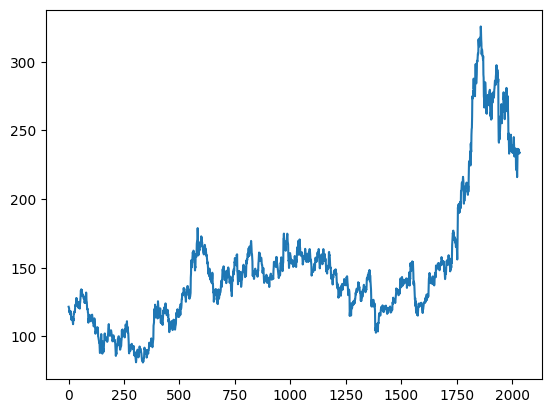

In [11]:
plt.plot(df['Close'])

<Axes: >

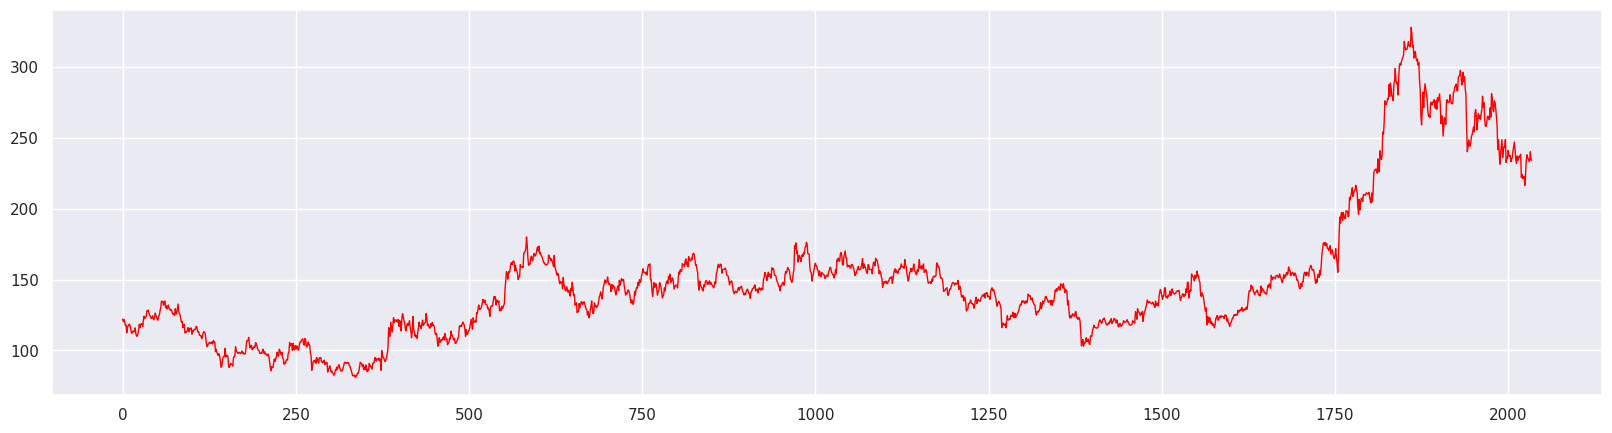

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
df['Open'].plot(linewidth=1,color='red')

<Axes: >

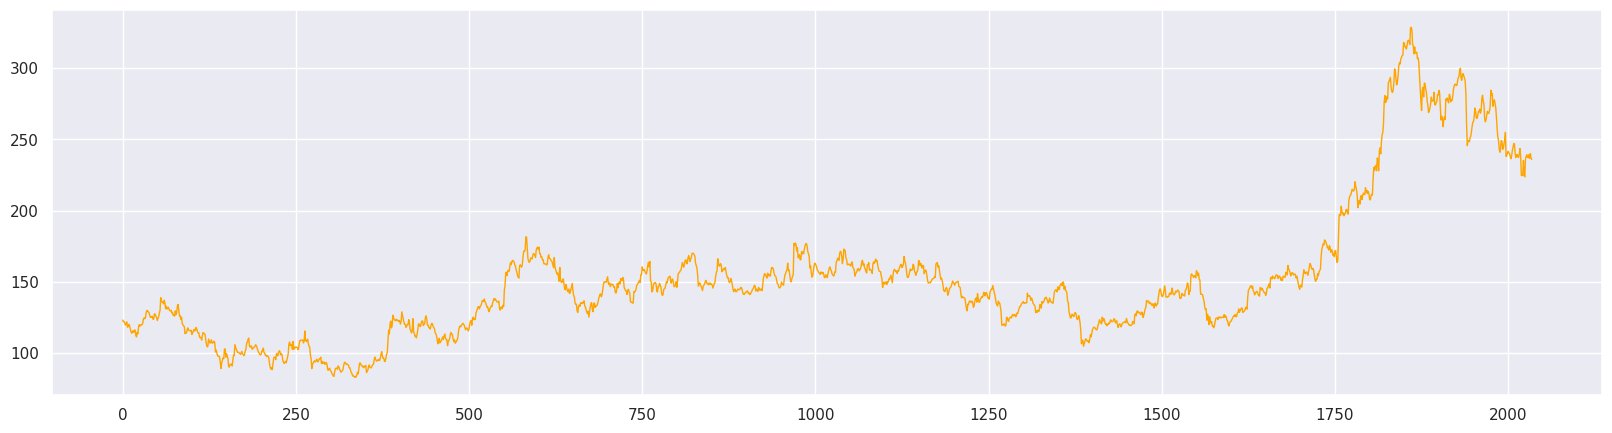

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
df['High'].plot(linewidth=1,color='orange')

<Axes: >

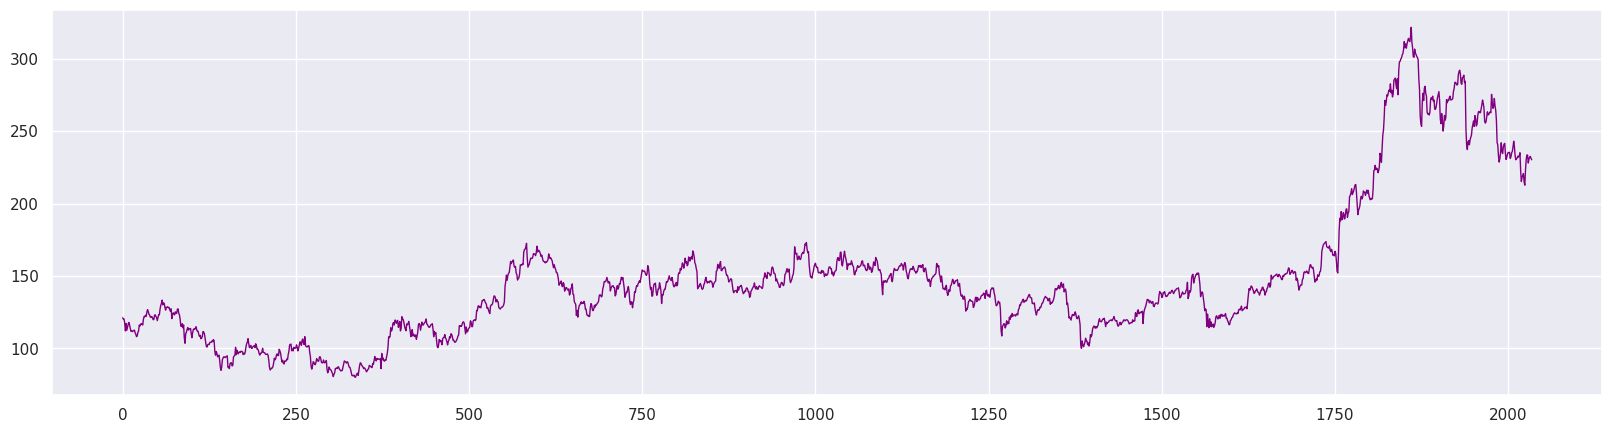

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
df['Low'].plot(linewidth=1,color='purple')

<Axes: >

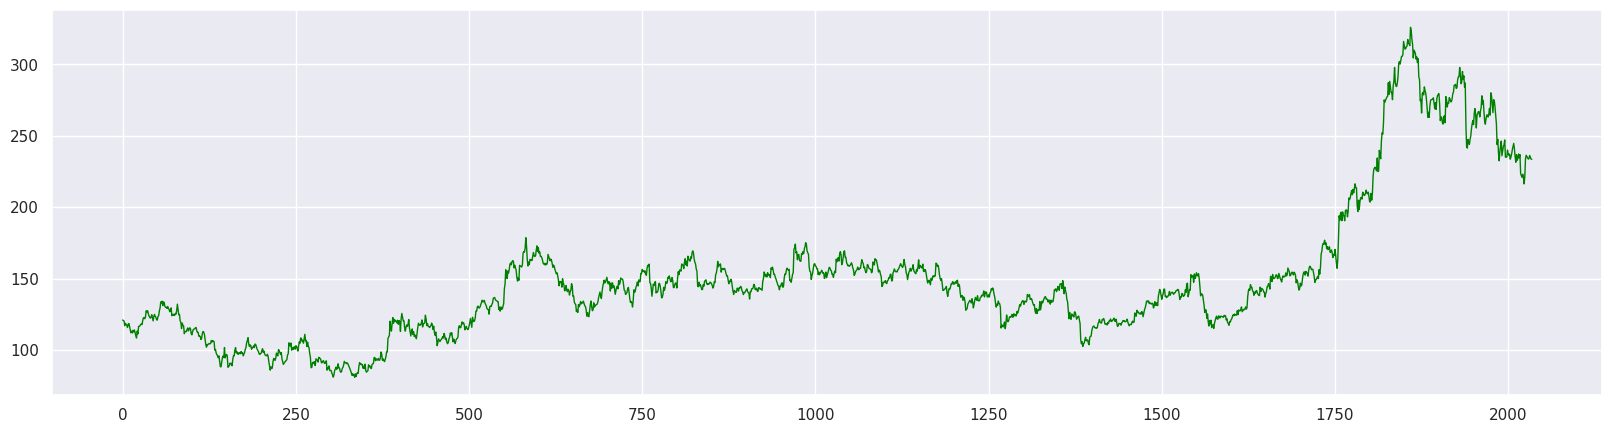

In [35]:
sns.set(rc={'figure.figsize':(20,5)})
df['Last'].plot(linewidth=1,color='green')

<Axes: >

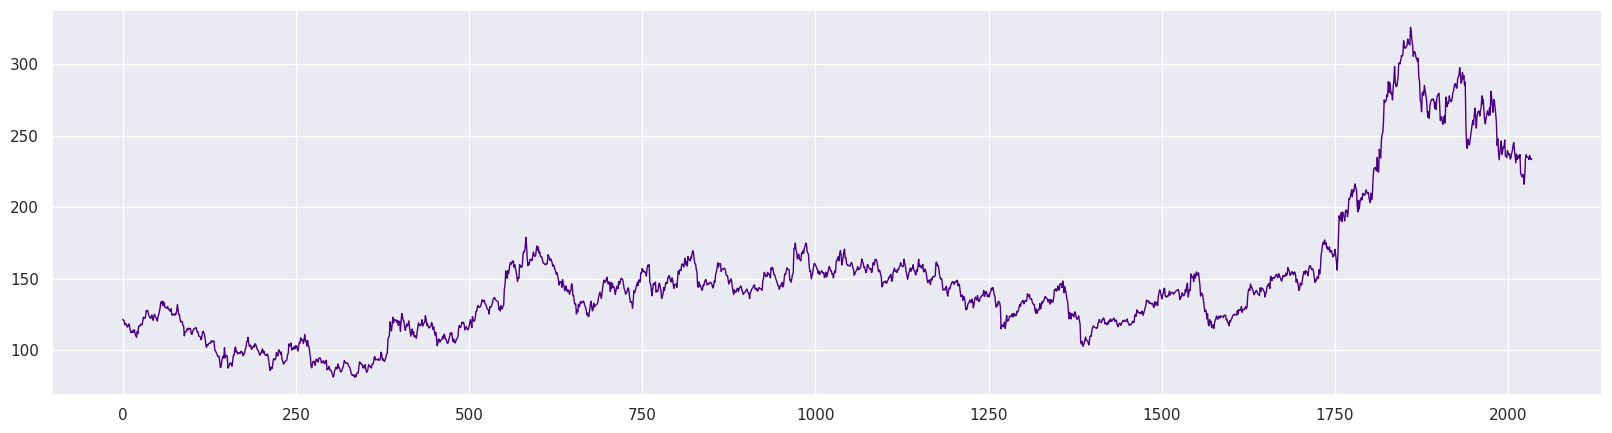

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
df['Close'].plot(linewidth=1,color='indigo')

<ipython-input-26-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

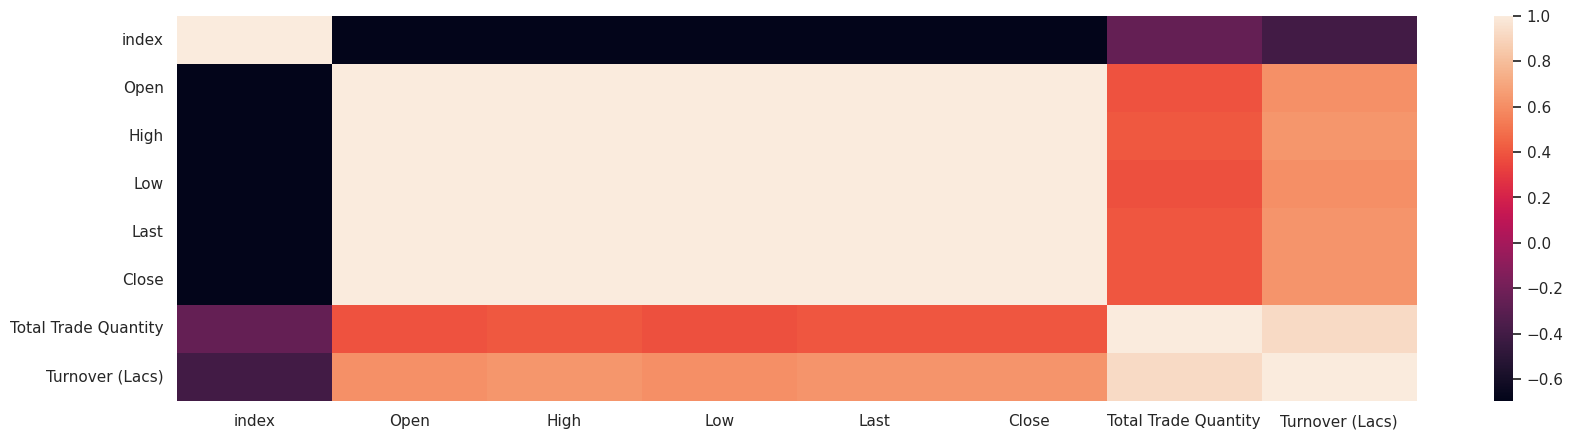

In [26]:
sns.heatmap(df.corr())

prepare data

In [37]:
df.rolling(7).mean().head(10)

<ipython-input-37-73361e2470bc>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(10)


,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2031.0,118.914286,121.378571,117.192857,119.107143,119.171429,8.103653e+05,965.581429
7,2030.0,118.114286,120.664286,116.271429,118.357143,118.385714,1.095726e+06,1295.455714
8,2029.0,117.685714,120.164286,115.750000,117.978571,117.871429,1.148623e+06,1356.124286
9,2028.0,117.185714,119.878571,115.414286,117.735714,117.535714,1.195755e+06,1411.334286


<Axes: >

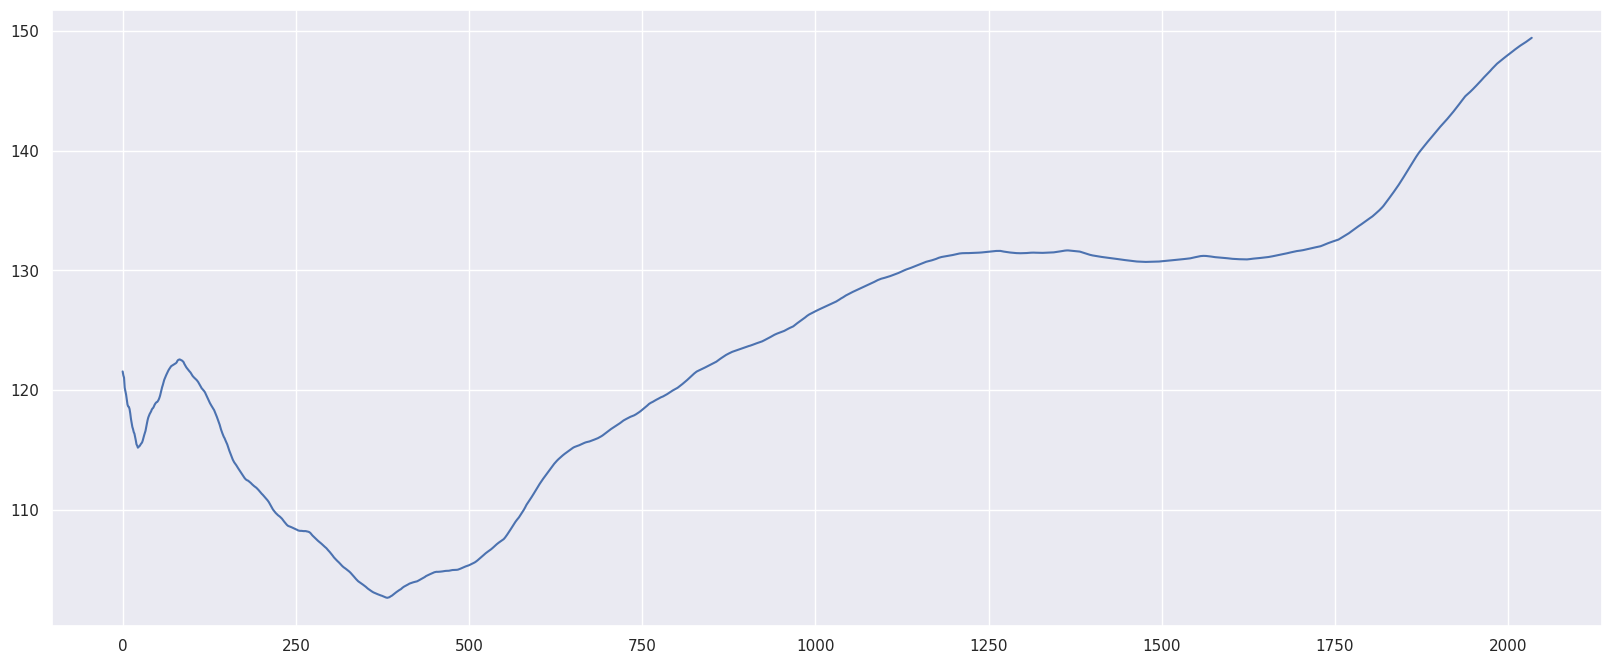

In [38]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha=1)

In [43]:
df1=df['Close']

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [42]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [44]:
training_size,test_size

(1424, 611)

In [49]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [50]:
time_step=100
x_train, y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data, time_step)

In [51]:
print(x_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [52]:
print(x_test.shape),print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [53]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

model building

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 8s 179ms/step - loss: 0.0095 - val_loss: 0.0024
Epoch 2/60
19/19 [==============================] - 2s 123ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/60
19/19 [==============================] - 2s 125ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 3s 160ms/step - loss: 9.2674e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 2s 126ms/step - loss: 8.9758e-04 - val_loss: 0.0013
Epoch 6/60
19/19 [==============================] - 2s 123ms/step - loss: 8.8053e-04 - val_loss: 0.0013
Epoch 7/60
19/19 [==============================] - 2s 127ms/step - loss: 8.4060e-04 - val_loss: 0.0012
Epoch 8/60
19/19 [==============================] - 5s 277ms/step - loss: 8.1666e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 2s 126ms/step - loss: 7.9830e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 2s 124ms/step - loss: 7

In [61]:
test_predict=model.predict(x_test)

16/16 [==============================] - 1s 29ms/step


In [65]:
test_predict1=scaler.inverse_transform(test_predict)

In [66]:
test_predict1

array([[34705.086],
       [34742.81 ],
       [34534.33 ],
       [33900.91 ],
       [33459.742],
       [33326.38 ],
       [33626.84 ],
       [34045.402],
       [34167.367],
       [34046.832],
       [33931.59 ],
       [34174.777],
       [34402.28 ],
       [34796.785],
       [35338.816],
       [34936.184],
       [34298.953],
       [34136.38 ],
       [34311.688],
       [35514.918],
       [36668.984],
       [37225.863],
       [37243.164],
       [36681.086],
       [36542.973],
       [36539.23 ],
       [36702.69 ],
       [37137.504],
       [37345.84 ],
       [37316.434],
       [37338.816],
       [37049.99 ],
       [36274.18 ],
       [34908.746],
       [34025.42 ],
       [33801.156],
       [33899.56 ],
       [33749.812],
       [33166.26 ],
       [32212.08 ],
       [31523.264],
       [31228.547],
       [30801.277],
       [30622.36 ],
       [30184.908],
       [29565.627],
       [29352.555],
       [29297.42 ],
       [29383.756],
       [29209.46 ],


In [69]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

208.08048332017384